In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\manso\Downloads\diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Heatmap

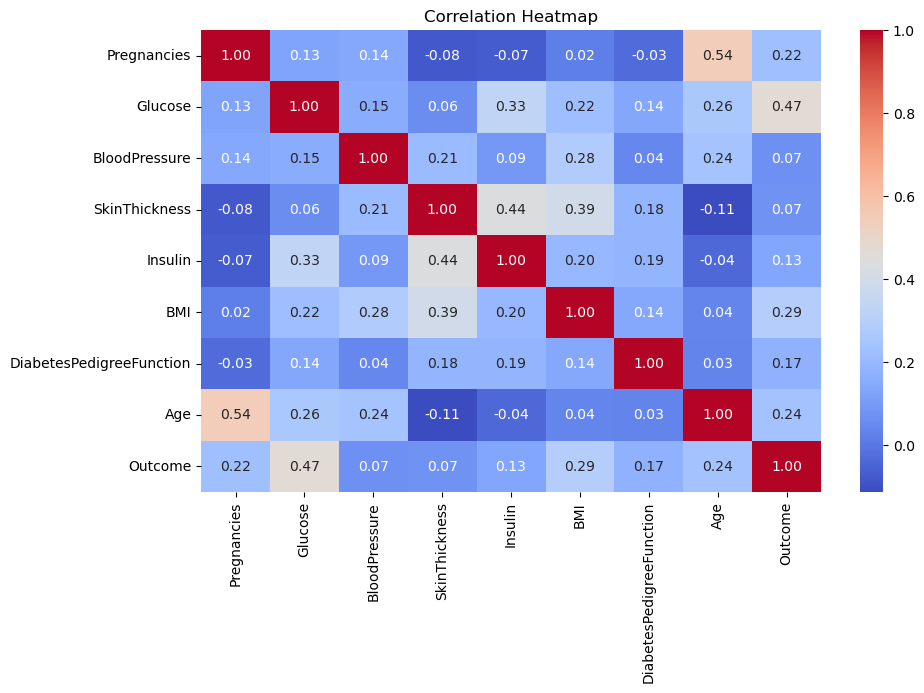

In [13]:
#Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# separate the input and output values

In [15]:
x = df.drop('Outcome',axis=1)
y=df['Outcome']


In [16]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
x.shape

(768, 8)

In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
y.shape

(768,)

In [20]:
#split the data into training and testings
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, random_state=42)

# For testing

In [21]:
model= LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Predictions

In [22]:
predictions = model.predict(x_test)

In [24]:
#Evaluate The Model

accuracy = accuracy_score(y_test, predictions)
conf_martix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, output_dict=True) #convey into dict output

In [25]:
# Convert the classification report into a DataFrame for easy plotting
report_data = pd.DataFrame(class_report).transpose()


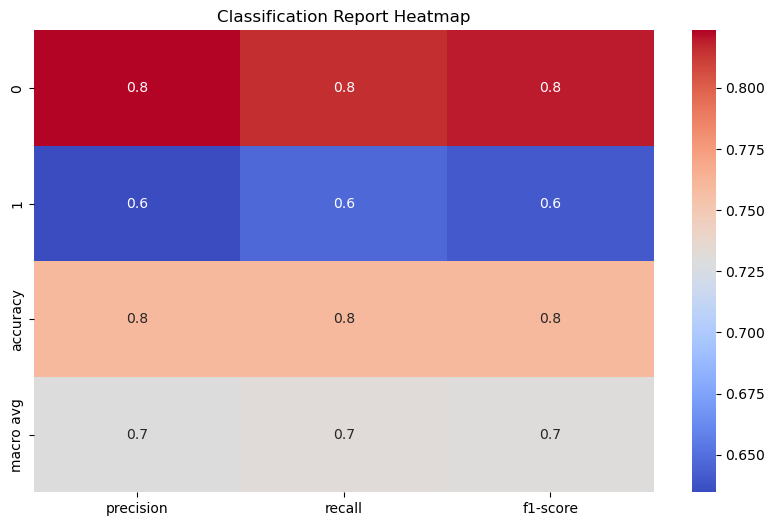

In [26]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_data.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.1f')  # Exclude support row and accuracy column
plt.title('Classification Report Heatmap')
plt.show()

In [27]:
# Print out accuracy and confusion matrix for reference
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_martix )

Accuracy:  0.7597402597402597
Confusion Matrix: 
 [[168  38]
 [ 36  66]]


Predicted class for the new data point: 1
Prediction probabilities: [[5.04569606e-07 9.99999495e-01]]


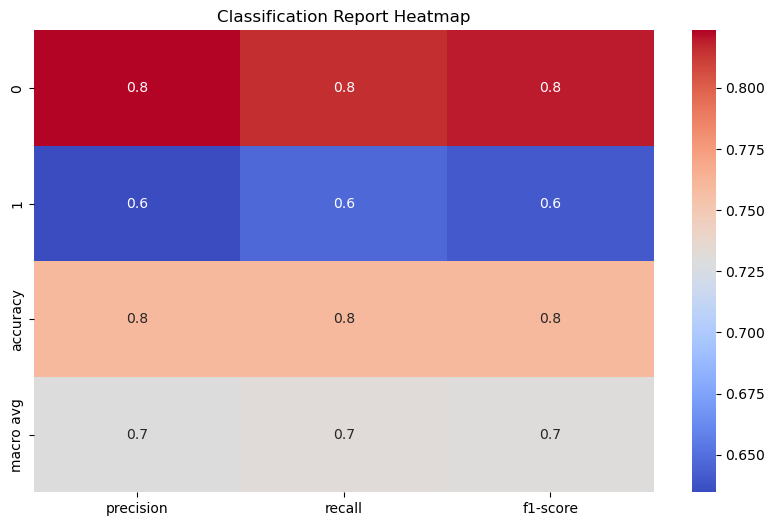

In [28]:
# New data point for prediction (must have 15 features as in the training set)
new_data_point =  [12,23.3,44,95,0.16,25,46,150]
  # Example 15 values, replace with actual values

# Reshape new data point to 2D array since a single sample needs to be in that format
import numpy as np
new_data_point = np.array(new_data_point).reshape(1, -1)

# Predict the class for the new data point
new_prediction = model.predict(new_data_point)
new_prediction_proba = model.predict_proba(new_data_point)

print(f"Predicted class for the new data point: {new_prediction[0]}")
print(f"Prediction probabilities: {new_prediction_proba}")

# Plot the heatmap of the classification report (same as before)
plt.figure(figsize=(10, 6))
sns.heatmap(report_data.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Classification Report Heatmap')
plt.show()


Please input the 8 features for prediction (separate each value with Enter):
Enter feature 1: 65
Enter feature 2: 87
Enter feature 3: 63
Enter feature 4: 54
Enter feature 5: 89
Enter feature 6: 94
Enter feature 7: 32
Enter feature 8: 34

Predicted class for the new data point: 1
Prediction probabilities: [[4.20159108e-09 9.99999996e-01]]


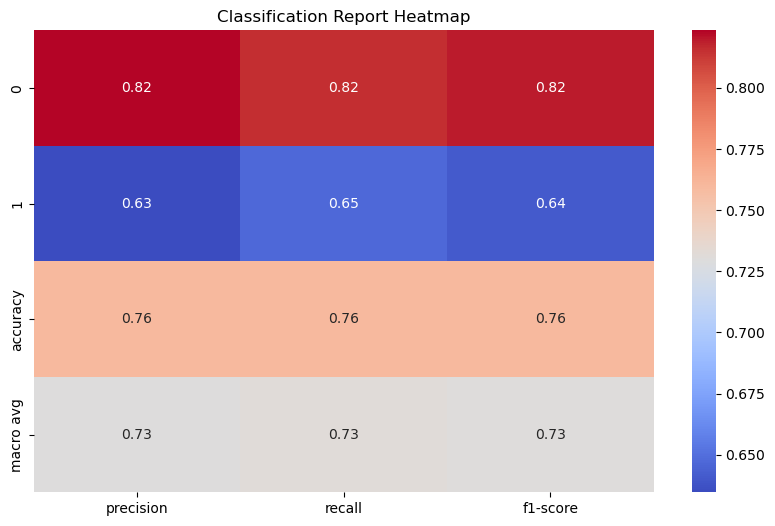

In [29]:
# Get the 15 features from the user
print("Please input the 8 features for prediction (separate each value with Enter):")
new_data_point = []
for i in range(1, 9):  # Loop for 15 features
    value = float(input(f"Enter feature {i}: "))
    new_data_point.append(value)

# Reshape new data point to 2D array since a single sample needs to be in that format
new_data_point = np.array(new_data_point).reshape(1, -1)

# Predict the class for the new data point
new_prediction = model.predict(new_data_point)
new_prediction_proba = model.predict_proba(new_data_point)

# Print predicted class and probabilities
print(f"\nPredicted class for the new data point: {new_prediction[0]}")
print(f"Prediction probabilities: {new_prediction_proba}")

# Plot the heatmap of the classification report (same as before)
plt.figure(figsize=(10, 6))
sns.heatmap(report_data.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()
